In [174]:
# SUJET : Comparaison des vainqueurs d’élections avec différents modes de vote

# par une étude probabiliste à partir de simulations
# de situations de vote - deux méthodes seront proches si elles ont le même vainqueur. C’est cette
# dernière comparaison que nous aimerions mettre en œuvre à partir d’un protocole de simulations.

# à partir des résultats obtenus par simulation, proposer une classification des méthodes par rapport aux
# vainqueurs obtenus pour chaque élection.

# générer les participants et les votes =>

# loi binomiale, loi uniforme, loi Bêta

# Pondorset, méthode de Gaut


# EXEMPLES MÉTHODES VOTES : Scrutin majoritaire à un tour, à deux tours, scrutin proportionnel,
# vote par approbation, scrutin par élimination, vote préférentiel, jugement majoritaire

# les meilleurs méthodes de votes dépendent du contexte et de ce que l'on veut faire
# exemple pour élection un des meilleurs => vote par approbation (simple et efficace)

# Parmi les méthodes de vote par évaluation,
# on peut citer le vote par approbation, le jugement majoritaire ou le vote à la moyenne.

# donc comparer les méthodes de votes entre elles et regarder pour chacune le nombre et le degrès de satisfaction
# des votants


# LIENS UTILES : 
# https://www.lamsade.dauphine.fr/~mayag/Chapter_3_Aggregation_functions_Slides_V2.pdf
# https://github.com/simberaj/votelib
# https://pypi.org/project/condorcet/
# https://monlyceenumerique.fr/formations_python/python_2021/dl/lois_probabilites_simulation.html

# SCIENCE ETONNANTE : https://youtu.be/ZoGH7d51bvc

# les cours de ce mec tout en  haut très utile (MASTER BDMA CentraleSupelec : Decision Modeling) :
# https://www.lamsade.dauphine.fr/~mayag/teaching.html

from platform import python_version
print("python version : ",python_version())

python version :  3.9.12


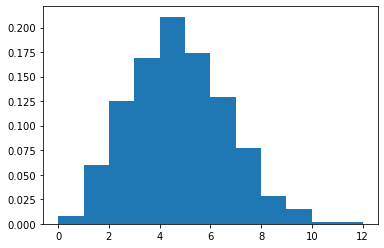

count :  [0.008 0.06  0.125 0.169 0.211 0.174 0.129 0.077 0.028 0.015 0.002 0.002]
bins :  [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]
{'Melanchon': 0.8, 'Lasalle': 6.0, 'Roussel': 12.5, 'Jadot': 16.900000000000002, 'Pecresse': 21.099999999999998, 'Arthaud': 17.4, 'Lepen': 12.9, 'Macron': 7.7, 'Pouton': 2.8000000000000003, 'Hidalgo': 1.5, 'DupontAignan': 0.2, 'Zemmour': 0.2}
100.0 

GAGNANT =  Pecresse  avec  21.099999999999998  %


In [175]:
from math import *
from random import *
import matplotlib.pyplot as plt 
import numpy as np
import random

# Essayer pour 15aine, 20, 50, 100, 1000, 10 000 votants
# Essayer pour 3, 4, 5, 7, 10, 12 candidats

candidats = ["Macron","Lasalle","Pouton","DupontAignan","Zemmour","Pecresse","Jadot","Hidalgo","Melanchon","Lepen","Roussel","Arthaud"]
random.shuffle(candidats)

binomiale = np.random.binomial(50,1/len(candidats),1000)#une array de 1000 valeurs d'une loi binomiale de 50 tirages avec probabilité de succès (1/len(candidats).

counts, bins, bars = plt.hist(binomiale,bins=len(candidats),density=True)
plt.show()

print("count : ",counts)
print("bins : ",bins)

res = {}
cpt = 0
test = 0
for c in candidats:
    res[c] = counts[cpt]*100
    test += counts[cpt]*100
    cpt+=1
    #

print(res)
print(test,"\n")


for key,value in res.items():
    if value == max(res.values()):
        print("GAGNANT = ",key," avec ",value," %")

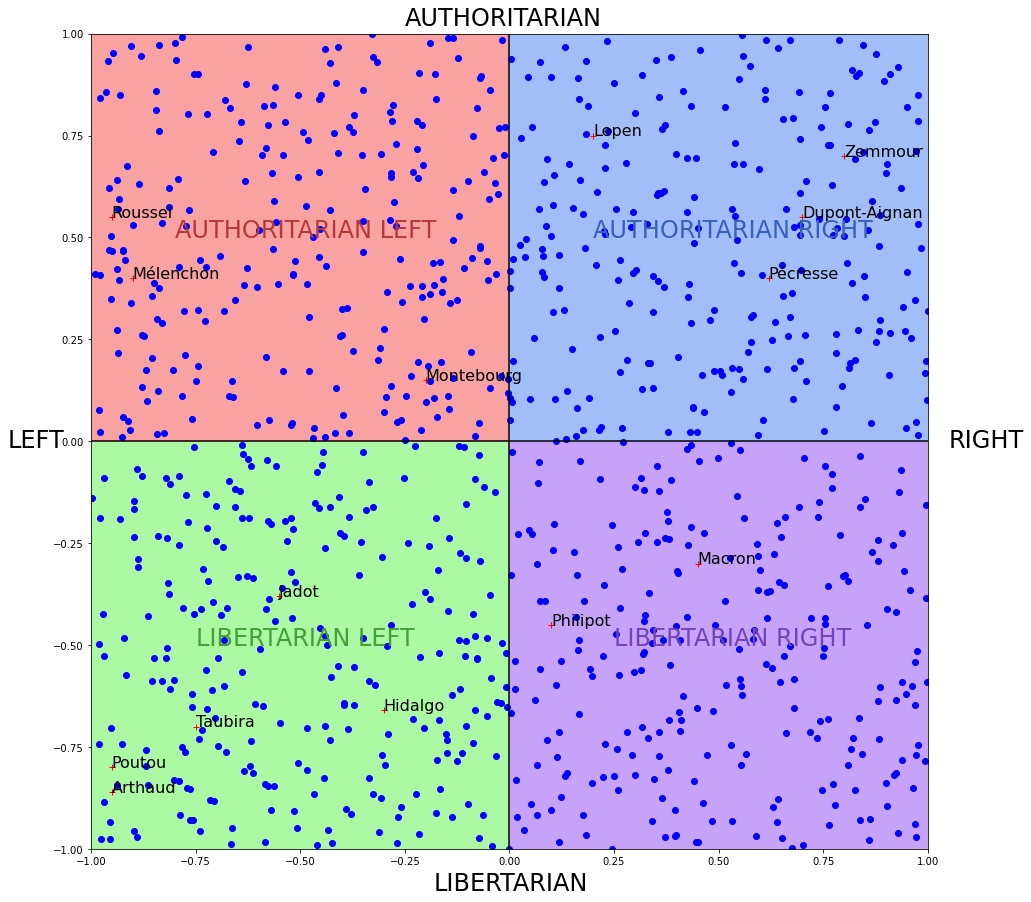

In [177]:
# faire un graphique comme le prof a fait et plot des points dans ce graphique => 
# avec la distance calculer les préférences de chacun

from matplotlib.patches import Rectangle
import matplotlib.pyplot as plt

# on prends comme exemple un politic compass, et on admets que les votants vont voter a chaque fois pour 
# les candidats qui sont les plus proches de leurs idées politiques (donc de leurs position => distance euclidienne)

# SOURCES : https://www.reddit.com/r/PoliticalCompass/comments/rsdf7t/political_compass_of_the_candidates_of_the_2022/

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)


#x = np.random.binomial(50, 0.5, 20000)
nombre_votants = 1000 # nb de votes

listeCoord = []

# Data for plotting
for i in range (0,nombre_votants):
    listeCoord.append([round(random.uniform(-1, 1.0),6),round(random.uniform(-1, 1.0),6)]) # entre -1 et 1, 4 chiffres après la virgule
    #print(round(random.uniform(-1, 1.0),6))
    #random.standard_normalro
    
for coord in listeCoord:
    plt.plot(coord[0], coord[1], 'bo')
    
# LABELS
plt.text(-0.8, 0.5, "AUTHORITARIAN LEFT", fontsize=24,color='#b43838')
plt.text(0.2, 0.5, "AUTHORITARIAN RIGHT", fontsize=24,color='#3661b9')
plt.text(-0.75, -0.5, "LIBERTARIAN LEFT", fontsize=24,color='#40a135')
plt.text(0.25, -0.5, "LIBERTARIAN RIGHT", fontsize=24,color='#7442b8')
plt.text(-1.2, -0.015, "LEFT", fontsize=24,color='black')
plt.text(1.05, -0.015, "RIGHT", fontsize=24,color='black')
plt.text(-0.25,1.02, "AUTHORITARIAN", fontsize=24,color='black')
plt.text(-0.18,-1.1, "LIBERTARIAN", fontsize=24,color='black')

# candidats présidentielle 2022, avec leurs position dans le graphique comme dans la source:
# PLOT YOUR CANDIDATES
dic = {"Zemmour":[0.8, 0.7],"Dupont-Aignan":[0.7, 0.55],"Pécresse":[0.62, 0.40],"Lepen":[0.2, 0.75],
       "Macron":[0.45, -0.3],"Philipot":[0.1, -0.45],"Montebourg": [-0.20,0.15],"Mélenchon":[-0.90,0.40],
       "Roussel":[-0.95,0.55],"Jadot":[-0.55,-0.38],"Hidalgo":[-0.3,-0.66],"Taubira":[-0.75,-0.7],
       "Poutou":[-0.95,-0.8],"Arthaud":[-0.95,-0.86]}

for name,coord in dic.items():
    plt.plot(coord[0],coord[1], 'r+')
    plt.text(coord[0],coord[1], name, fontsize=16,color='black')

# AXES
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.vlines(x = 0, ymin=-1, ymax=1,color = 'black', linestyle = '-')

# couleurs rectangle
rect1 = Rectangle((0,0),-1,-1,color ='#abf9a2')
rect2 = Rectangle((0,0),-1,1,color ='#f9a2a2')
rect3 = Rectangle((0,0),1,1,color ='#a2bef9')
rect4 = Rectangle((0,0),1,-1,color ='#c7a2f9')
ax.add_patch(rect1)
ax.add_patch(rect2)
ax.add_patch(rect3)
ax.add_patch(rect4)

plt.xlim([-1,1])
plt.ylim([-1,1])

#faire les fleches
#arrowed_spines(fig, ax)

plt.show()


# Simuler l'opinion politiques des candidats et donc leurs préférences parmit les candidats
def distanceEuclidienne(coord1,coord2):
    x1,y1 = coord1
    x2,y2 = coord2
    return math.sqrt(pow(x2-x1,2)+pow(y2-y1,2))

In [178]:
# LES DIFFÉRENTES MÉTHODES DE VOTES IMPLÉMENTÉES : 

# Scrutin majoritaire à un tour => FAIT
# Scrutin majoritaire à deux tours => FAIT
# Vote par approbation => FAIT
# Vote préférentiel (gagnant déterminé par le principe de Condorcet) => FAIT
# Méthode de vote de Borda => FAIT
# Vote Alternatif (ou vote par élimination successive => FAIT


# Jugement majoritaire (Balinsky) OU vote a la moyenne => https://www.youtube.com/watch?v=aOFlwlCX3oA


#Parmi les méthodes de vote par évaluation,
#on peut citer le vote par approbation, le jugement majoritaire ou le vote à la moyenne.


# "Le vote par élimination successive est utilisé pour l'élection présidentielle en Irlande,
# pour l'élection des députés en Australie et, depuis cette année, pour toutes les élections dans
# l'Etat du Maine aux Etats-Unis", selon Sylvain Bouveret, de l'université de Grenoble.


#"Kenneth Arrow, prix Nobel d'économie, a démontré en 1951 que le scrutin parfait n'existait pas, 
#donc on essaye de trouver celui qui reflète le plus possible la préférence des électeurs", 
#conclut Herrade Igersheim. Tout en gardant à l'esprit qu'en la matière "la neutralité n'existe pas".



# On voudrait un système de vote qui satisfasse au moins 2 conditions : 
# - 1 : quand un candidat progresse dans l'opinion, il ne peut que progresser à la fin 
# (mais ce n'est pas le cas pour certaine méthodes comme le scrutin majoritaire classique par ex).
# - 2 : que le résultat final ne soit pas dépendant de l'ajout ou du retrait de candidats mineurs qui
# n'ont aucune chance d'aller au bout.

# or ce n'est pas possible => 
# Théorème d'impossibilité de Kenneth Arrow : il n'existe aucun système électoral qui satisfait ces 2 conditions

# mais le théorème d'impossibilité ne porte que sur les systèmes de votes où ont classe les candidats 
# (or pour l'approbation on ne classe pas les candidats par préférences)

# Problème avec l'approbation on ne peut pas modérer nos préférences entre Très bien et 'Passable'
# alors rentre en jeu le jugement majoritaire : https://youtu.be/ZoGH7d51bvc?t=987
# où chacun est jugé indépendament, donc pas de vote utile, on échappe au paradoxe d'Arrow =>
# quand on progresse dans l'opinion on ne peut pas regresser

In [179]:
import math
import random

def majoriteAbsolue(nbVoix,nbTotalVotant):
    if nbTotalVotant%2 == 0: # pair
        if nbVoix >= ((nbTotalVotant / 2) + 1):
            return True
        else:
            return False
    else: # impair
        if nbVoix >= (nbTotalVotant+1 / 2):
            return True
        else:
            return False
        

In [180]:
# $ pip install condorcet
import condorcet

# VOTE PRÉFÉRENTIEL : =>
# on élu le gagnant avec la méthode de condorcet =>
# Vainqueur de Condorcet = candidat qui gagne tous ses duels fasse a chaque autres candidats

# Le principe de Condorcet favorise les centristes, mais en même temps quand il s'agit de démocratie 
# le principe de majorité invite à chercher le consensus, et le centre représente bien ce consensus

# une méthode de vote est 'bonne' si elle n'élu jamais le perdant de condorcet

def methodeDeCondorcet(): # OK
    candidates = []
    for candidate in dic.keys():
        candidates.append(candidate) # nom des candidats
    votes = []
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de 1 à len(candidats) : (1 => le mieux noté)
        cptCandidat = 1
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat +=1 
        
        votes.append(preferencesVotant)
        
    evaluator = condorcet.CondorcetEvaluator(candidates=candidates, votes=votes)
    # returns a list containing at most the first n winners in order
    # and the rest
    winners, rest_of_table = evaluator.get_n_winners(1)
    # On considère qu'il n'y a qu'un seul gagnant car les cas où toutes les options se valent sont très très rares
    # (dans notre contexte)
    print("\n Gagnant du vote préférentiel (par la méthode de Condorcet): ",winners[0],"\n")
    print("\n reste de la table : ",rest_of_table)
    return winners[0]
    
winnerDeCondorcet = methodeDeCondorcet()


def tauxDeSatisfaction(coord,votes):
    #ressemble au vote a la moyenne ...
    #sur un echelle de 1 à 10
    #
    #si distance euclidienne < 0.1 alors 10/10, si distance > 2 alors 0/10  
    pass


 Gagnant du vote préférentiel (par la méthode de Condorcet):  Montebourg 


 reste de la table :  {'Dupont-Aignan': {'wins': ['Zemmour', 'Mélenchon', 'Roussel', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Pécresse', 'Lepen', 'Macron', 'Philipot', 'Jadot', 'Hidalgo']}, 'Zemmour': {'wins': ['Roussel', 'Poutou', 'Arthaud'], 'losses': ['Dupont-Aignan', 'Pécresse', 'Lepen', 'Macron', 'Philipot', 'Mélenchon', 'Jadot', 'Hidalgo', 'Taubira']}, 'Pécresse': {'wins': ['Zemmour', 'Dupont-Aignan', 'Lepen', 'Mélenchon', 'Roussel', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Macron', 'Philipot', 'Jadot', 'Hidalgo']}, 'Lepen': {'wins': ['Zemmour', 'Dupont-Aignan', 'Mélenchon', 'Roussel', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Pécresse', 'Macron', 'Philipot', 'Jadot', 'Hidalgo']}, 'Macron': {'wins': ['Zemmour', 'Dupont-Aignan', 'Pécresse', 'Lepen', 'Mélenchon', 'Roussel', 'Jadot', 'Hidalgo', 'Taubira', 'Poutou', 'Arthaud'], 'losses': ['Philipot']}, 'Philipot': {'wins': ['Zemmour', 'Dupont-Aign

In [181]:
def approbation(): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        #aller jusqu'a len(dic) n'est pas adapté (personne ne vote comme ça ou très peu)
        nombreApprobation = int(round(random.uniform(1,4),0)) # entre 1 et 4 approbation par votant
        #nombreApprobation = 3 # 3 approbations max par votant
        
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        lastDic = {}
        # Les approbations sont faites en fonction de la distance avec chaque candidat
        for appro in range(nombreApprobation):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # OK, ici on a nos votes, il faut calculer donc le vainqueur 
    # calculer celui qui a le plus de votes 
    res = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if res.get(k):
                res[k] += 1
            else:
                res[k] = 1
  
    ordre = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    print(ordre)
    gagnant = list(ordre.keys())[0]
    print("\n Gagnant(s) du vote par approbation: ",gagnant)
    return gagnant
    
winnerApprobation = approbation()

if winnerApprobation != winnerPreferentielCondorcet:
    print("La méthode par approbation n'élit pas le vainqueur de Condorcet (",winnerDeCondorcet,")")
else:
    print("La méthode par approbation élit le vainqueur de Condorcet (",winnerDeCondorcet,")")


{'Philipot': 289, 'Macron': 283, 'Montebourg': 272, 'Pécresse': 230, 'Jadot': 201, 'Hidalgo': 199, 'Lepen': 192, 'Dupont-Aignan': 180, 'Mélenchon': 161, 'Roussel': 137, 'Taubira': 126, 'Zemmour': 95, 'Poutou': 61, 'Arthaud': 47}

 Gagnant(s) du vote par approbation:  Philipot
La méthode par approbation n'élit pas le vainqueur de Condorcet ( Montebourg )


In [182]:
nbTours = 2

def uninominal(nbTours = 1): # OK
    resVotes = {}
    cptVotant = 0
    for coordV in listeCoord:
        nbIteration = 1
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        lastDic = {}
        for appro in range(nbIteration):
            min_value = min(tmpDistance.values())
            nom = [k for k, v in tmpDistance.items() if v == min_value]
            tmpDistance.pop(nom[0])
            lastDic[nom[0]] = min_value
        
        resVotes[cptVotant] = lastDic
        cptVotant +=1
        
    # Résultats 1er tour :
    resultat1erTour = {}
    for dico in resVotes.values():
        for k,v in dico.items():
            if resultat1erTour.get(k):
                resultat1erTour[k] += 1
            else:
                resultat1erTour[k] = 1
                
    premierTour = dict(sorted(resultat1erTour.items(), key=lambda item: item[1],reverse=True))
    print("résultats 1er tour => \n",premierTour)
     
    
    # Si majoité absolue => pas de 2eme tour
    if majoriteAbsolue(list(premierTour.values())[0],nombre_votants):
        gagnant = list(premierTour.keys())[0]
        nb_voix = list(premierTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        print("majoité absolue !")
        print("\n Gagnant du vote uninominal : ",gagnant, " avec ",pourcentage,"%")
        return gagnant 
        
    if nbTours == 2:
        cptVotant = 0
        resVotes = {}
        for coordV in listeCoord:
            tmpDistance = {}
            # prendre les noms et coordonnées des 2 premiers :
            premier = dic.get(list(premierTour.keys())[0])
            deuxieme = dic.get(list(premierTour.keys())[1])
            deuxPremiers = {}
            deuxPremiers[list(premierTour.keys())[0]] = premier
            deuxPremiers[list(premierTour.keys())[1]] = deuxieme
            
            for candidat,coordC in deuxPremiers.items():
                tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
            
            lastDic = {}
            for k,v in tmpDistance.items():
                if v==min(tmpDistance.values()):
                    lastDic[k] = v
                    
            resVotes[cptVotant] = lastDic
            cptVotant +=1
        
        # Résultats 2nd tour :
        resultat2emeTour = {}
        for dico in resVotes.values():
            for k,v in dico.items():
                if resultat2emeTour.get(k):
                    resultat2emeTour[k] += 1
                else:
                    resultat2emeTour[k] = 1
        secondTour = dict(sorted(resultat2emeTour.items(), key=lambda item: item[1],reverse=True))
        print("\n résultats 2eme tour => \n",secondTour)
        gagnant = list(secondTour.keys())[0]
        nb_voix = list(secondTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        print("\n Gagnant du vote uninominal à 2 tours : ",gagnant, " avec ",pourcentage,"% \n")
        return gagnant
    
    else:
        gagnant = list(premierTour.keys())[0]
        nb_voix = list(premierTour.values())[0]
        pourcentage = round((nb_voix/nombre_votants)*100,2)
        print("\n Gagnant du vote  uninominal à 1 tour: ",gagnant, " avec ",pourcentage,"% \n")
        return gagnant
    
winnerUninominal = uninominal(nbTours)

if winnerUninominal != winnerPreferentielCondorcet:
    print("Le scrutin uninominal à ",nbTours,"tours n'élit pas le vainqueur de Condorcet (",winnerDeCondorcet,")")
else:
    print("Le scrutin uninominal à ",nbTours,"tours élit le vainqueur de Condorcet (",winnerDeCondorcet,")")



résultats 1er tour => 
 {'Macron': 172, 'Montebourg': 119, 'Lepen': 114, 'Philipot': 98, 'Jadot': 82, 'Pécresse': 82, 'Hidalgo': 70, 'Mélenchon': 64, 'Roussel': 61, 'Taubira': 48, 'Zemmour': 45, 'Dupont-Aignan': 26, 'Arthaud': 12, 'Poutou': 7}

 résultats 2eme tour => 
 {'Montebourg': 575, 'Macron': 425}

 Gagnant du vote uninominal à 2 tours :  Montebourg  avec  57.5 % 

Le scrutin uninominal à  2 tours élit le vainqueur de Condorcet ( Montebourg )


In [183]:
# VOTE DE BORDA : (type vote préférentiel) ressemble à condorcet mais dans des rares cas
# elle n'élit pas le vainqueur de condorcet donc elle reste quand même très bien

def methodeDeBorda(): # OK
    votes = []
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de len(candidats) à 1 : (la + note la plus haute => mieux est le candidat)
        cptCandidat = len(dic)
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat -=1 
        
        votes.append(preferencesVotant)
    
    # Résultats : 
    res = {}
    for dico in votes:
        for k,v in dico.items():
            if res.get(k):
                res[k] += v
            else:
                res[k] = v
                
    res = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
    gagnant = list(res.keys())[0]
    print("\n Gagnant du vote de Borda : ",gagnant)
    print("\n résultats => ",res,"\n")
    return gagnant
    
winnerBorda = methodeDeBorda()

if winnerBorda != winnerPreferentielCondorcet:
    print("La méthode de vote de Borda n'élit pas le vainqueur de Condorcet (",winnerDeCondorcet,")")
else:
    print("La méthode de vote de Borda élit le vainqueur de Condorcet (",winnerDeCondorcet,")")
    
    


 Gagnant du vote de Borda :  Montebourg

 résultats =>  {'Montebourg': 10455, 'Philipot': 9628, 'Jadot': 9207, 'Macron': 8927, 'Hidalgo': 8593, 'Pécresse': 8498, 'Lepen': 7871, 'Dupont-Aignan': 7170, 'Mélenchon': 7093, 'Taubira': 6927, 'Roussel': 5782, 'Zemmour': 5533, 'Poutou': 5139, 'Arthaud': 4177} 

La méthode de vote de Borda élit le vainqueur de Condorcet ( Montebourg )


In [184]:
# Vote alternatif (ou vote par élimination successive, ou vote à second tour instantané )
# source = https://youtu.be/ZoGH7d51bvc?t=303

# à chaque tours on enlève le dernier, et on continu jusqu'à ce 
# qu'il reste un seul candidat ou si un candidat à la majorité absolue ( 50 % + 1 ).
# essayer avec et sans majorité Absolue pour voir si ça change !

# Dans sa forme absolue, où l’électeur est obligé de classer tous les candidats

# Vote alternatif = Plus simple => on ne fait qu'un seul tour 

def voteAlternatif(): # OK
    votes = []
    
    # calcul des préférences de chacun
    for coordV in listeCoord:
        tmpDistance = {}
        for candidat,coordC in dic.items():
            tmpDistance[candidat] = distanceEuclidienne(coordV,coordC)
        
        preferencesVotant = dict(sorted(tmpDistance.items(), key=lambda item: item[1],reverse=False))
        
        # On convertit la distance en note de 1 à len(candidats) :
        cptCandidat = 1
        for nom,distance in preferencesVotant.items():
            preferencesVotant[nom] = cptCandidat
            cptCandidat +=1         
        votes.append(preferencesVotant)
    
    # on touche pas au truc d'en haut, les votants ne votent qu'une seule fois (un seul tour) ! 
    res = {}
    candidats_elimines = []
    
    # On élimine les derniers candidats
    while(len(res) != 1):
        for vote in votes:
            for nom,classement in vote.items():
                # on recherche le premier candidat pas éliminé de la liste du votant
                if nom not in candidats_elimines:
                    premier_candidat_pas_elimine = nom
                    # on a trouvé => break
                    break
                else:
                    premier_candidat_pas_elimine = ""
                    
            if premier_candidat_pas_elimine != "":
                if res.get(premier_candidat_pas_elimine):
                    # on est déjà passé sur le candidat
                    res[premier_candidat_pas_elimine] += 1
                else:
                    # il a été mit qu'une seule fois premier pour l'instant
                    res[premier_candidat_pas_elimine] = 1

        res = dict(sorted(res.items(), key=lambda item: item[1],reverse=True))
        print(res)
        last_key_res = list(res)[-1]
        candidats_elimines.append(last_key_res)
        res.pop(last_key_res) # on enlève le dernier
        #reset tout les votes pour redistribuer les préférences, sans celui qui a sauté
        if len(res) != 1:
            for k,v in res.items():
                res[k] = 0
        
    # Résultat : 
    gagnant = list(res)[0]
    print(res,"\n")
    print("Gagnant par la méthode de vote alternative = ",gagnant)
    return gagnant

winnerAlternatif = voteAlternatif()


if winnerAlternatif != winnerPreferentielCondorcet:
    print("La méthode de vote alternative n'élit pas le vainqueur de Condorcet (",winnerDeCondorcet,")")
else:
    print("La méthode de vote alternative élit le vainqueur de Condorcet (",winnerDeCondorcet,")")

{'Macron': 172, 'Montebourg': 119, 'Lepen': 114, 'Philipot': 98, 'Jadot': 82, 'Pécresse': 82, 'Hidalgo': 70, 'Mélenchon': 64, 'Roussel': 61, 'Taubira': 48, 'Zemmour': 45, 'Dupont-Aignan': 26, 'Arthaud': 12, 'Poutou': 7}
{'Macron': 172, 'Montebourg': 119, 'Lepen': 114, 'Philipot': 98, 'Jadot': 82, 'Pécresse': 82, 'Hidalgo': 70, 'Mélenchon': 64, 'Roussel': 61, 'Taubira': 50, 'Zemmour': 45, 'Dupont-Aignan': 26, 'Arthaud': 17}
{'Macron': 172, 'Montebourg': 119, 'Lepen': 114, 'Philipot': 98, 'Jadot': 82, 'Pécresse': 82, 'Hidalgo': 70, 'Taubira': 67, 'Mélenchon': 64, 'Roussel': 61, 'Zemmour': 45, 'Dupont-Aignan': 26}
{'Macron': 172, 'Montebourg': 119, 'Lepen': 114, 'Philipot': 98, 'Pécresse': 95, 'Jadot': 82, 'Hidalgo': 70, 'Taubira': 67, 'Mélenchon': 64, 'Roussel': 61, 'Zemmour': 58}
{'Macron': 172, 'Pécresse': 142, 'Lepen': 125, 'Montebourg': 119, 'Philipot': 98, 'Jadot': 82, 'Hidalgo': 70, 'Taubira': 67, 'Mélenchon': 64, 'Roussel': 61}
{'Macron': 172, 'Pécresse': 142, 'Lepen': 127, 'Mélen

In [185]:
# noter les candidats et retenir celui qui à la note médiane la + élevée

# La méthode de Borda et le jugement majoritaire tendent à élirent le vainqueur de Concorcet
# même si  dans des rares cas elle n'élissent pas le vainqueur de condorcet 
# mais dans les cas pratique et en elles restent quand même très fiable.

# Inconvenients : Ces méthodes contrairement à notre scrutin actuel sont difficile à mettre en place (quoi que...)

# ou note par moyenne (valeur)

mentions = ["Excellent","Très Bien","Bien","Assez Bien","Passable","Insuffisant","A Rejeter"]
mentions_to_note = [6,5,4,3,2,1,0]

# https://youtu.be/ZoGH7d51bvc?t=987

# https://youtu.be/ZZb4TjvupkI?t=641

# Par Balinsky

def jugementMajoritaire():
    pass
